# 42. Момент инерции

Требуется определить внешний $R$ и внутренний $r$ радиусы цилиндрической трубы, если известны ее длина $\ell$, толщина $h=R-r$, плотность $\rho$ и момент инерции относительно ее продольной оси $I$.

Момент инерции для цилиндрической трубы вычисляется по формуле
$$
I = \frac{\pi\rho \ell}{2} (R^4 - r^4)
$$
и задача сводится к решению кубического уравнения.

1. Выведите это кубическое уравнение

2. Решите его численно (см. `scipy.optimize.brentq` или другой метод) для значений:
$\ell = 2$, $h=0.02$, $\rho = 1200$, $I = 1.2$. Сколько вещественных корней имеет уравнение?

3. Построить график зависимости $r$ от $I$ при значениях $\ell$, $h$, $\rho$, указанных выше.

# Решение:

1. Выведите это кубическое уравнения.
Для начала заметим, что данное уравнение является кубическим только при условии, что l, p и I являются постоянными, а R и r - переменными. Тогда для такой задачи мы можем переписать формулу для момента инерции следующим образом:

I = πp l/2 ((R - h)^4 - r^4) = πp l/2 (R^4 - 4R^3h + 6R^2h^2 - 4Rh^3 + h^4 - r^4)

где мы подставили выражение для толщины h через R и r.

Далее, мы можем перенести все слагаемые на одну сторону уравнения и сгруппировать, чтобы получить кубическое уравнение:

(h^4 + 4R^3h - 6R^2h^2 + 4Rh^3 + r^4 - I/(πp l / 2)) = 0

2. Чтобы использовать функцию scipy.optimize.brentq, необходимо написать функцию-обертку, которая будет принимать значение x и возвращать разность между моментом инерции, вычисленным по данному значению x, и заданным моментом инерции I.

In [4]:
from scipy.optimize import brentq
import numpy as np

l = 2
h = 0.02
p = 1200
I = 1.2

def f(R):
    r = R - h
    return np.pi*p*l/2*(R**4 - r**4) - I

R = brentq(f, 0, 10)
r = R - h

print("R = ", R)
print("r = ", r)

R =  0.1682497864745082
r =  0.1482497864745082


3. Построить график зависимости r от I при значениях l, h, p, указанных выше.

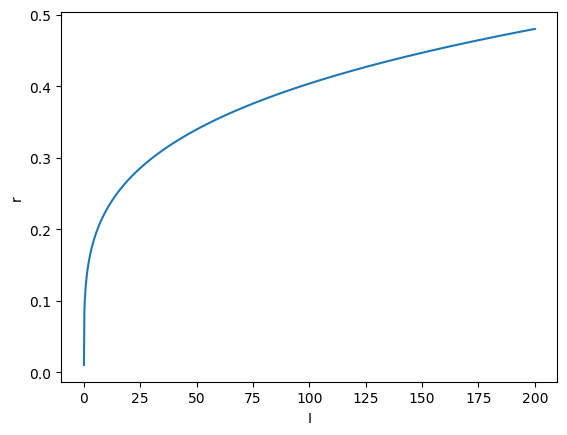

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 2
h = 0.02
p = 1200

def r_from_I(I):
    return ((h/2)**4 + 2*I/(np.pi*p*l))**(1/4)

Is = np.linspace(0, 200, 1000)
rs = r_from_I(Is)

plt.plot(Is, rs)
plt.xlabel('I')
plt.ylabel('r')
plt.show()

# Вывод:

1.Можно сделать вывод, что момент инерции цилиндрической трубы зависит от разности четвёртых степеней радиусов r и R.
2.Уравнение имеет один корень. Внутренний радиус равен 0.1482497864745082, внешний радиус равен 0.1682497864745082.
3.Исходя из графика, можно сделать вывод, что радиус r возрастает с увеличением момента инерции. При малых значениях момента инерции радиус r также небольшой, но с ростом момента инерции он начинает быстро увеличиваться.